author: Ben

purpose: demonstrate common methods for characterizing data

## characterize the environment hosting the notebook

In [1]:
!hostname

d4d0d6e7b8b4


In [2]:
import sys
print('Python version:',sys.version)
#print('Python version info:',sys.version_info)

Python version: 3.6.6 | packaged by conda-forge | (default, Oct 12 2018, 14:08:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [3]:
!conda list ipython

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
ipython                   7.0.1           py36h24bf2e0_1000    conda-forge
ipython_genutils          0.2.0                      py_1    conda-forge


In [4]:
!jupyter --version

4.4.0


## load modules

In [5]:
import pandas
pandas.__version__

'0.23.4'

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn
seaborn.__version__

'0.9.0'

In [8]:
!pip install missingno

In [9]:
import missingno as msno # Download via https://github.com/ResidentMario/missingno 

## load data into pandas

In [10]:
df = pandas.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv", 
                     skiprows=[1035],
                     skipinitialspace=True)

## what are the columns and their types?

In [11]:
# df.columns.tolist()
df.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(lbs)       float64
Age               float64
dtype: object

## what are the dimensions of the table?

In [12]:
rows, cols = df.shape

print ("Number of rows: ", rows)
print ("Number Of columns: ", cols)

Number of rows:  1034
Number Of columns:  6


## inspect the contents

In [13]:
df.head()
# if the number of columns is large, use the transpose
# df.head().T

,Name,Team,Position,Height(inches),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180.0,22.99
1,Paul Bako,BAL,Catcher,74,215.0,34.69
2,Ramon Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin Millar,BAL,First Baseman,72,210.0,35.43
4,Chris Gomez,BAL,First Baseman,73,188.0,35.71


In [14]:
df.describe(include = 'all')

,Name,Team,Position,Height(inches),Weight(lbs),Age
count,1034,1034,1034,1034.000000,1033.000000,1034.000000
unique,1032,30,9,NaN,NaN,NaN
top,Tony Pe?a,NYM,Relief Pitcher,NaN,NaN,NaN
freq,2,38,315,NaN,NaN,NaN
mean,NaN,NaN,NaN,73.697292,201.689255,28.736712
std,NaN,NaN,NaN,2.305818,20.991491,4.320310
min,NaN,NaN,NaN,67.000000,150.000000,20.900000
25%,NaN,NaN,NaN,72.000000,187.000000,25.440000
50%,NaN,NaN,NaN,74.000000,200.000000,27.925000
75%,NaN,NaN,NaN,75.000000,215.000000,31.232500


Black column means entries have values; white columns = missing value.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

See examples at https://github.com/ResidentMario/missingno

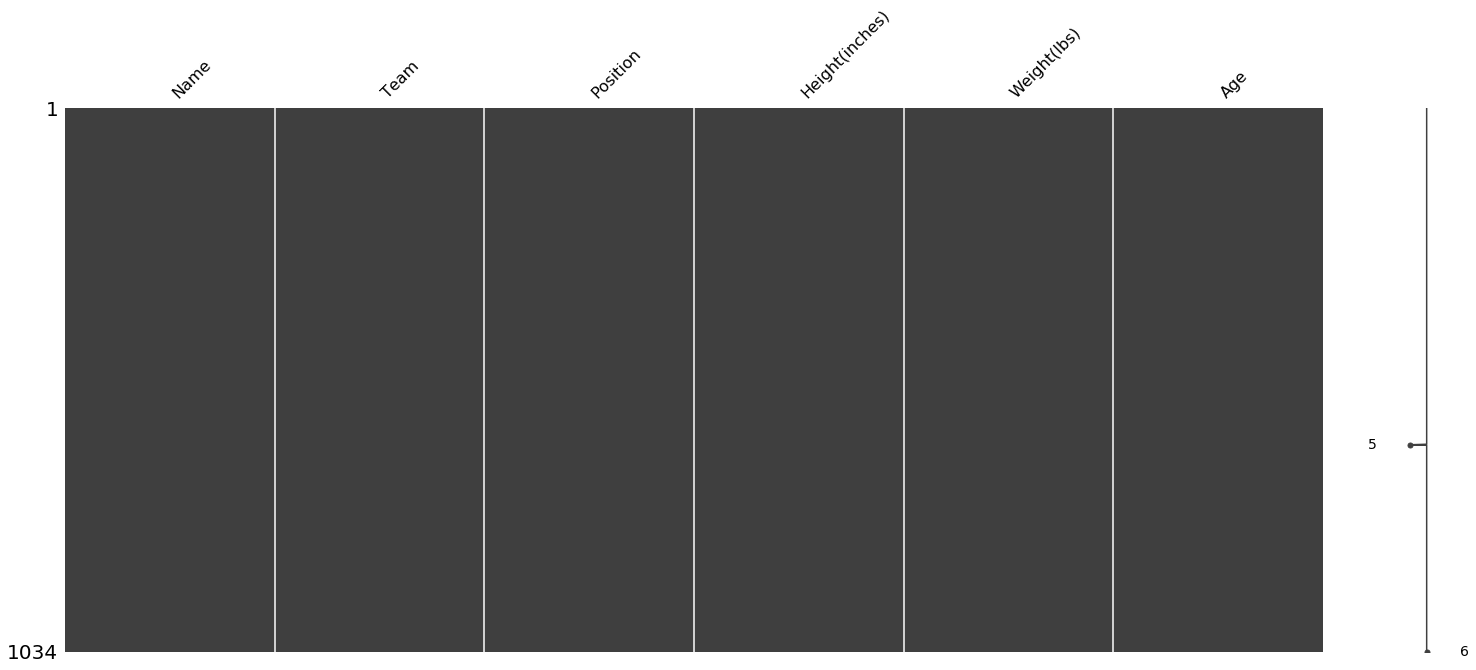

In [15]:
msno.matrix(df);

## unique entries per column

In [16]:
for this_column in df.columns:
    print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
    print(df[this_column].value_counts().head(10))

====  Name has 1032 unique entries ====
Tony Pe?a         2
Chris Young       2
Ben Zobrist       1
Bob Howry         1
Bernie Castro     1
Robb Quinlan      1
Mark Kotsay       1
Carlos Beltran    1
Chad Orvella      1
Jason Hammel      1
Name: Name, dtype: int64
====  Team has 30 unique entries ====
NYM    38
DET    37
OAK    37
ATL    37
CHC    36
BOS    36
CIN    36
PHI    36
WAS    36
KC     35
Name: Team, dtype: int64
====  Position has 9 unique entries ====
Relief Pitcher       315
Starting Pitcher     221
Outfielder           194
Catcher               76
Second Baseman        58
First Baseman         55
Shortstop             52
Third Baseman         45
Designated Hitter     18
Name: Position, dtype: int64
====  Height(inches) has 17 unique entries ====
74    175
73    167
75    160
72    152
76    103
71     89
77     57
70     52
78     27
69     19
Name: Height(inches), dtype: int64
====  Weight(lbs) has 89 unique entries ====
200.0    108
190.0     97
180.0     81
210.0     

## histogram of single numeric array

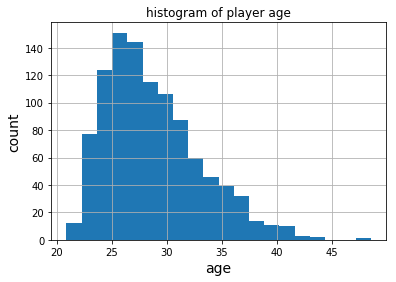

In [17]:
_=df['Age'].hist(bins=20)
_=plt.xlabel('age',fontsize=14)
_=plt.ylabel('count',fontsize=14)
_=plt.title('histogram of player age')

## correlation
[Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is 
 - +1 in the case of a perfect direct (increasing) linear relationship (correlation)
 - −1 in the case of a perfect decreasing (inverse) linear relationship (anticorrelation)
 - zero for uncorrelated

In [18]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


visualization of correlation for 2 variables, along with respective histograms

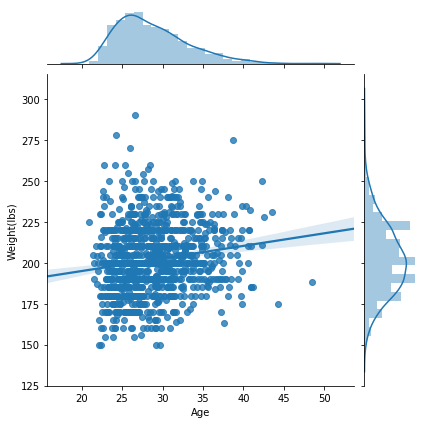

In [19]:
_=seaborn.jointplot("Age","Weight(lbs)",data=df,kind="reg")

visualization of correlation for pairs of variables, along with respective histograms

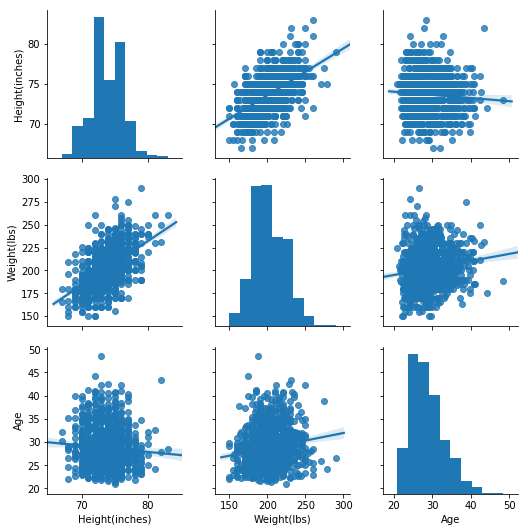

In [20]:
_=seaborn.pairplot(df.dropna(), kind="reg")
plt.show()